In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage, dendrogram
import warnings
warnings.filterwarnings('ignore')

Let's upload the data and have a look

In [2]:
df = pd.read_csv('C:/Users/Jesús García/Documents/CREAR PORTAFOLIO RAFA/GITHUB/proyecto-portafolio/DATOS/gapminder_full.csv')
df.head()

,country,year,population,continent,life_exp,gdp_cap
0,Afghanistan,1952,8425333,Asia,28.801,779.445314
1,Afghanistan,1957,9240934,Asia,30.332,820.853030
2,Afghanistan,1962,10267083,Asia,31.997,853.100710
3,Afghanistan,1967,11537966,Asia,34.020,836.197138
4,Afghanistan,1972,13079460,Asia,36.088,739.981106


In [3]:
df.shape

(1704, 6)

In [4]:
df.isna().sum()

country       0
year          0
population    0
continent     0
life_exp      0
gdp_cap       0
dtype: int64

In [5]:
df.dtypes

country        object
year            int64
population      int64
continent      object
life_exp      float64
gdp_cap       float64
dtype: object

In [7]:
df.describe()

,year,population,life_exp,gdp_cap
count,1704.00000,1.704000e+03,1704.000000,1704.000000
mean,1979.50000,2.960121e+07,59.474439,7215.327081
std,17.26533,1.061579e+08,12.917107,9857.454543
min,1952.00000,6.001100e+04,23.599000,241.165876
25%,1965.75000,2.793664e+06,48.198000,1202.060309
50%,1979.50000,7.023596e+06,60.712500,3531.846988
75%,1993.25000,1.958522e+07,70.845500,9325.462346
max,2007.00000,1.318683e+09,82.603000,113523.132900


In [8]:
df.country.nunique()

142

In [9]:
df.year.nunique()

12

In [10]:
df.year.unique()

array([1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002,
       2007], dtype=int64)

In [16]:
df.continent.unique()

array(['Asia', 'Europe', 'Africa', 'Americas', 'Oceania'], dtype=object)

Relation b/w life expectancy and GDP per capita

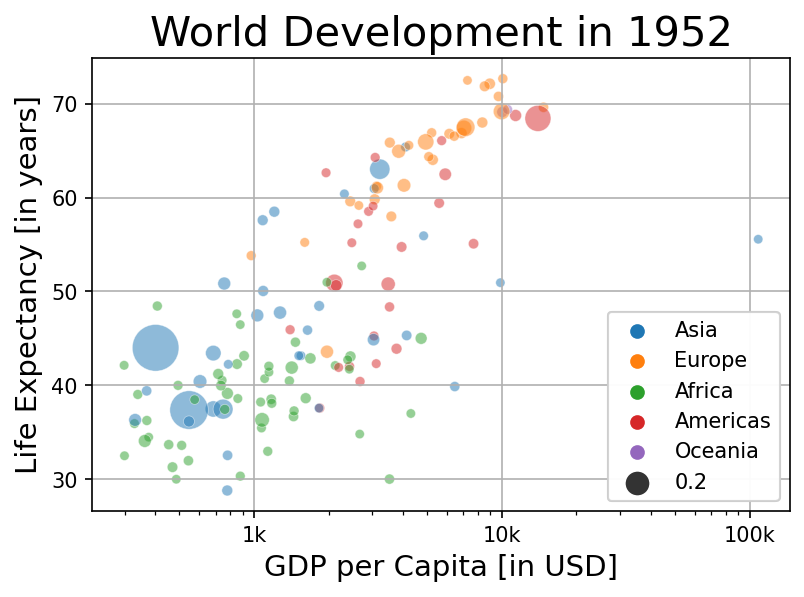

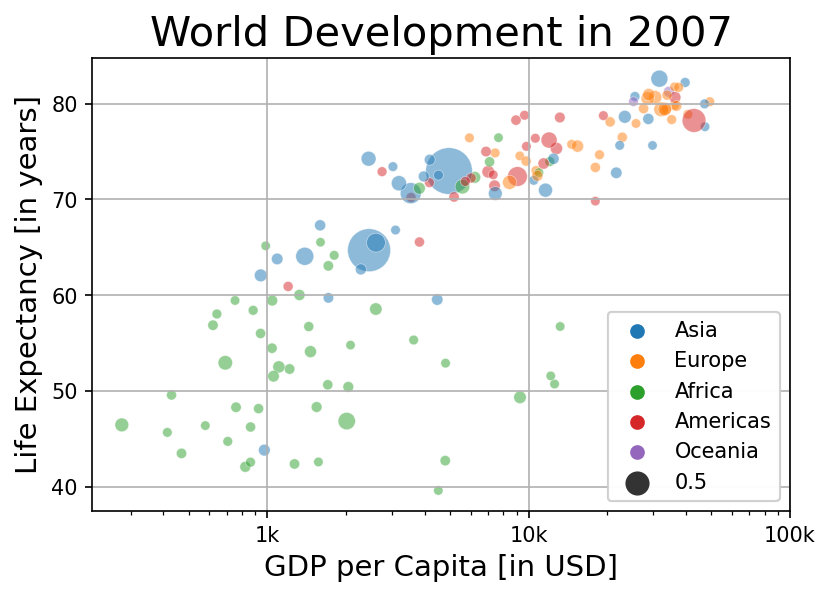

In [17]:
def life_exp_vs_gdp_cap(year):

    dff = df[df['year']==year]
    plt.figure(dpi=150)
    np_pop = np.array(dff.population)
    np_pop2 = np_pop*2
    plot = sns.scatterplot(dff['gdp_cap'], dff['life_exp'], hue=dff['continent'], 
                    size=np_pop2, sizes=(20,500), alpha=0.5)
    h, l = plot.get_legend_handles_labels()
    col_lgd = plt.legend(h[:6], l[:6])
    plt.gca().add_artist(col_lgd)
    plt.grid(True)
    
    plt.xscale('log')
    plt.xlabel('GDP per Capita [in USD]', fontsize=14)
    plt.ylabel('Life Expectancy [in years]', fontsize=14)
    plot_title = 'World Development in ' + str(year)
    plt.title(plot_title, fontsize=20)
    plt.xticks([1000, 10000, 100000],['1k', '10k', '100k'])
    plt.show()
    

life_exp_vs_gdp_cap(1952)
life_exp_vs_gdp_cap(2007)

It can be seen from the above diagram that increment in GDP per Capita positively affects life expectancy.  For different year value( chose from df.country.unique) in function life_exp_vs_gdp_cap, respective plot will be plotted. 

Now let's find out, how close are countries with each other based on different features. 
Note:-  The y-axis is a measure of closeness of either individual data points or clusters.  

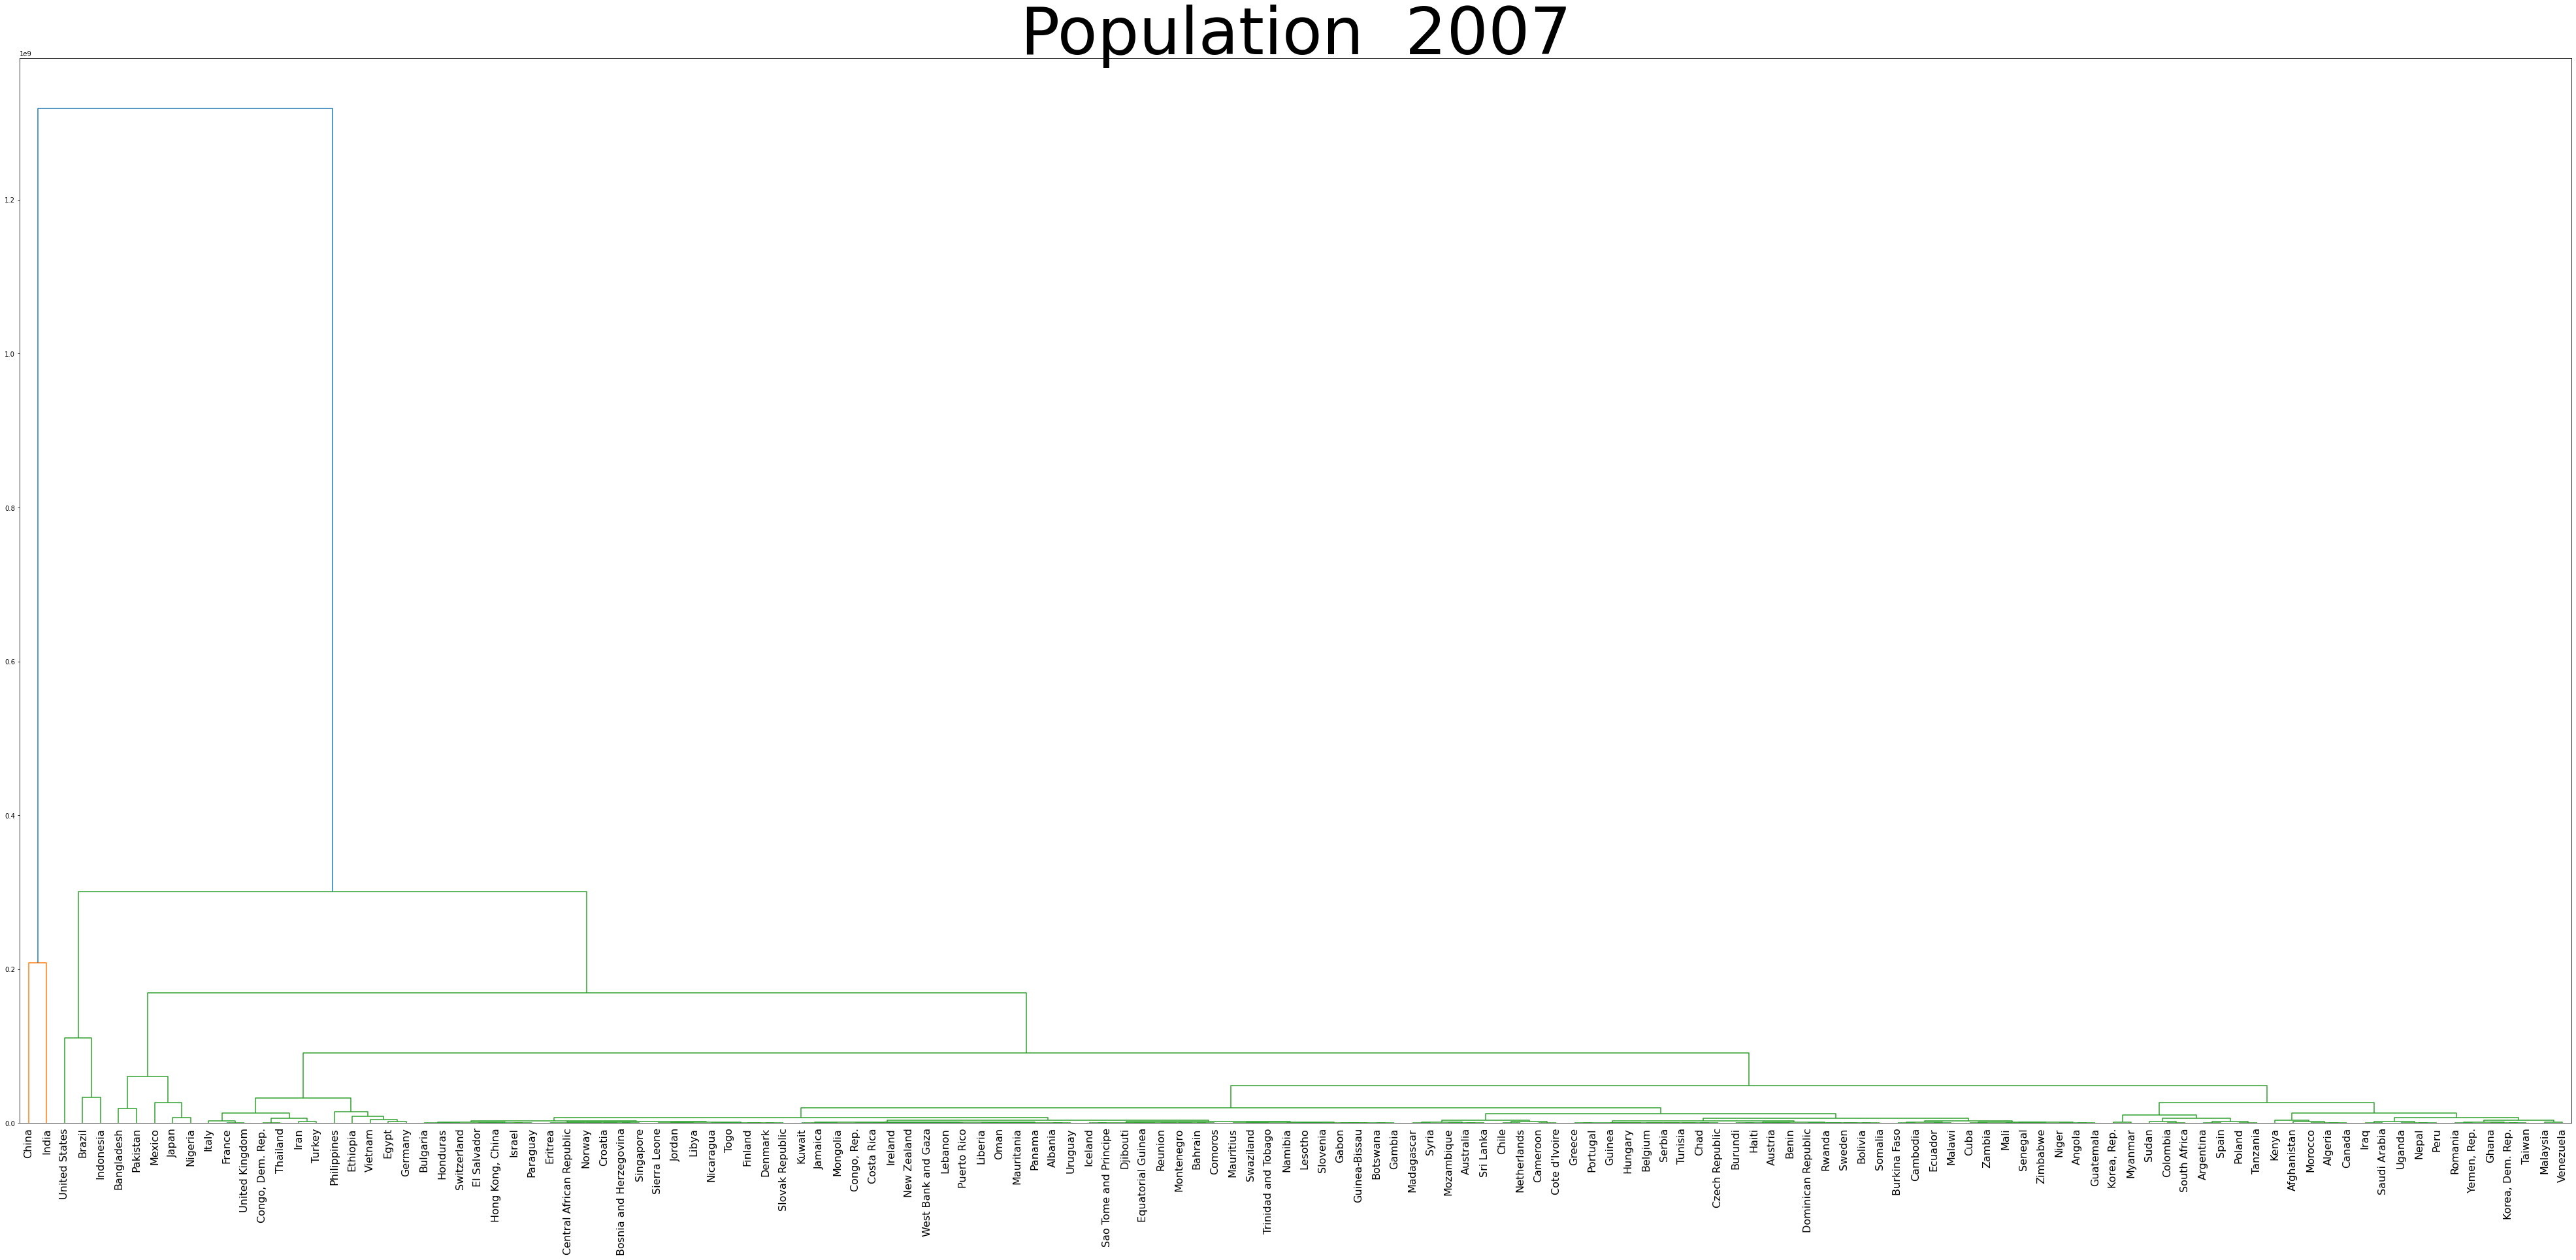

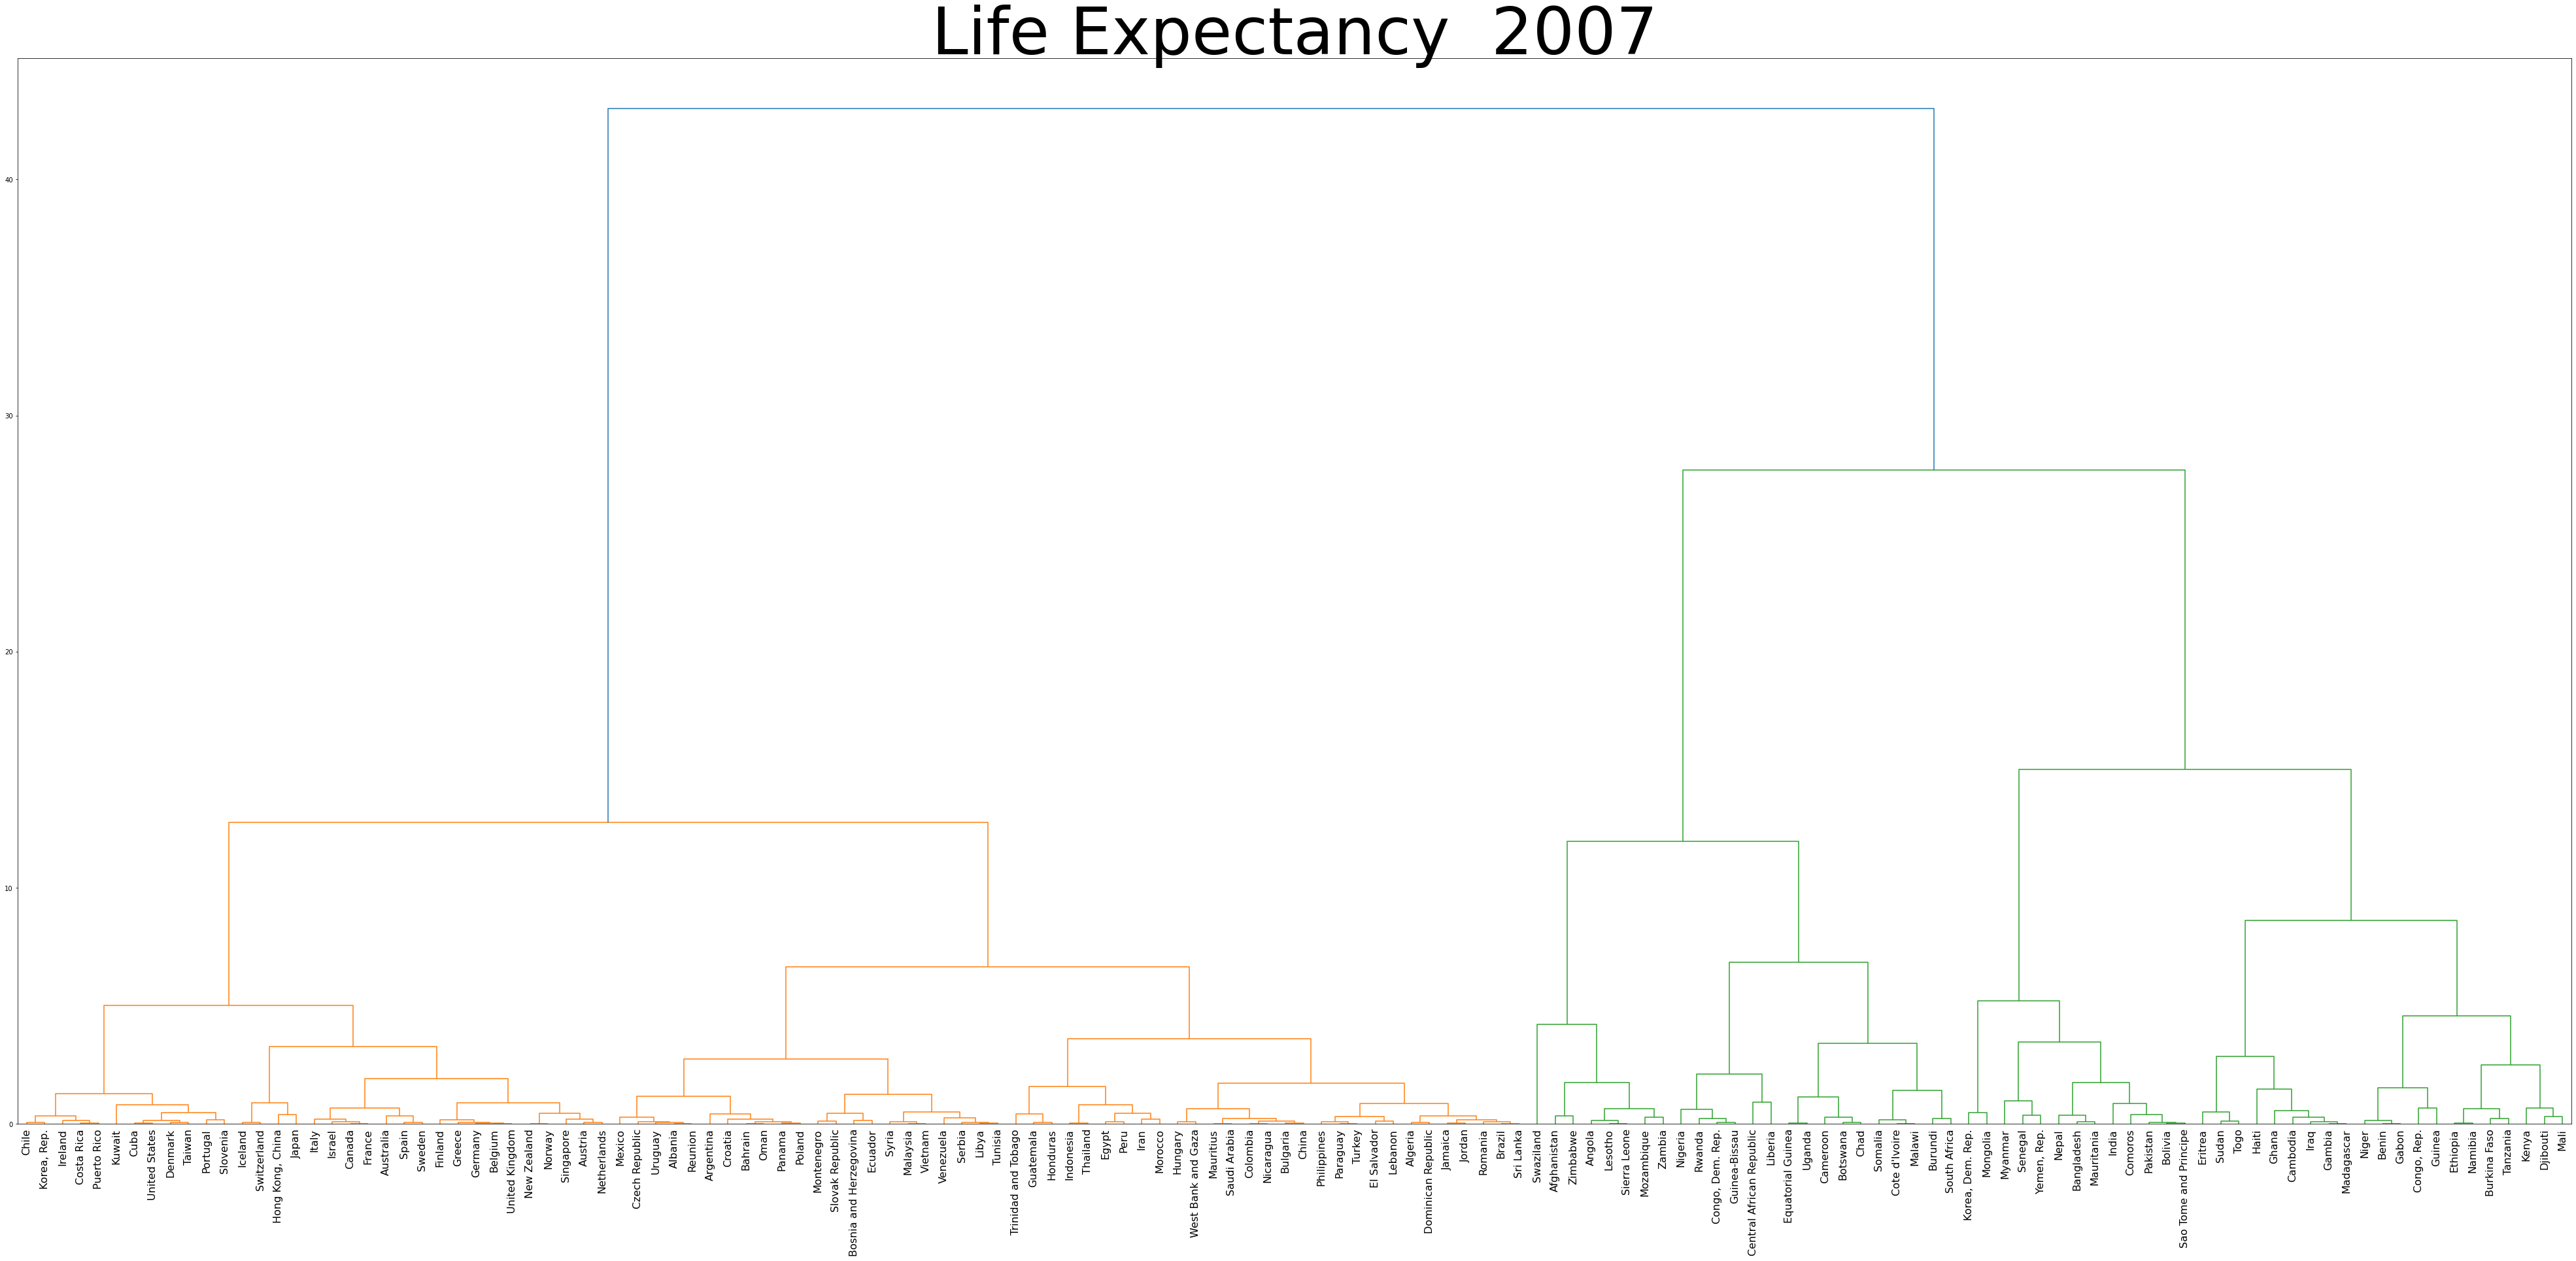

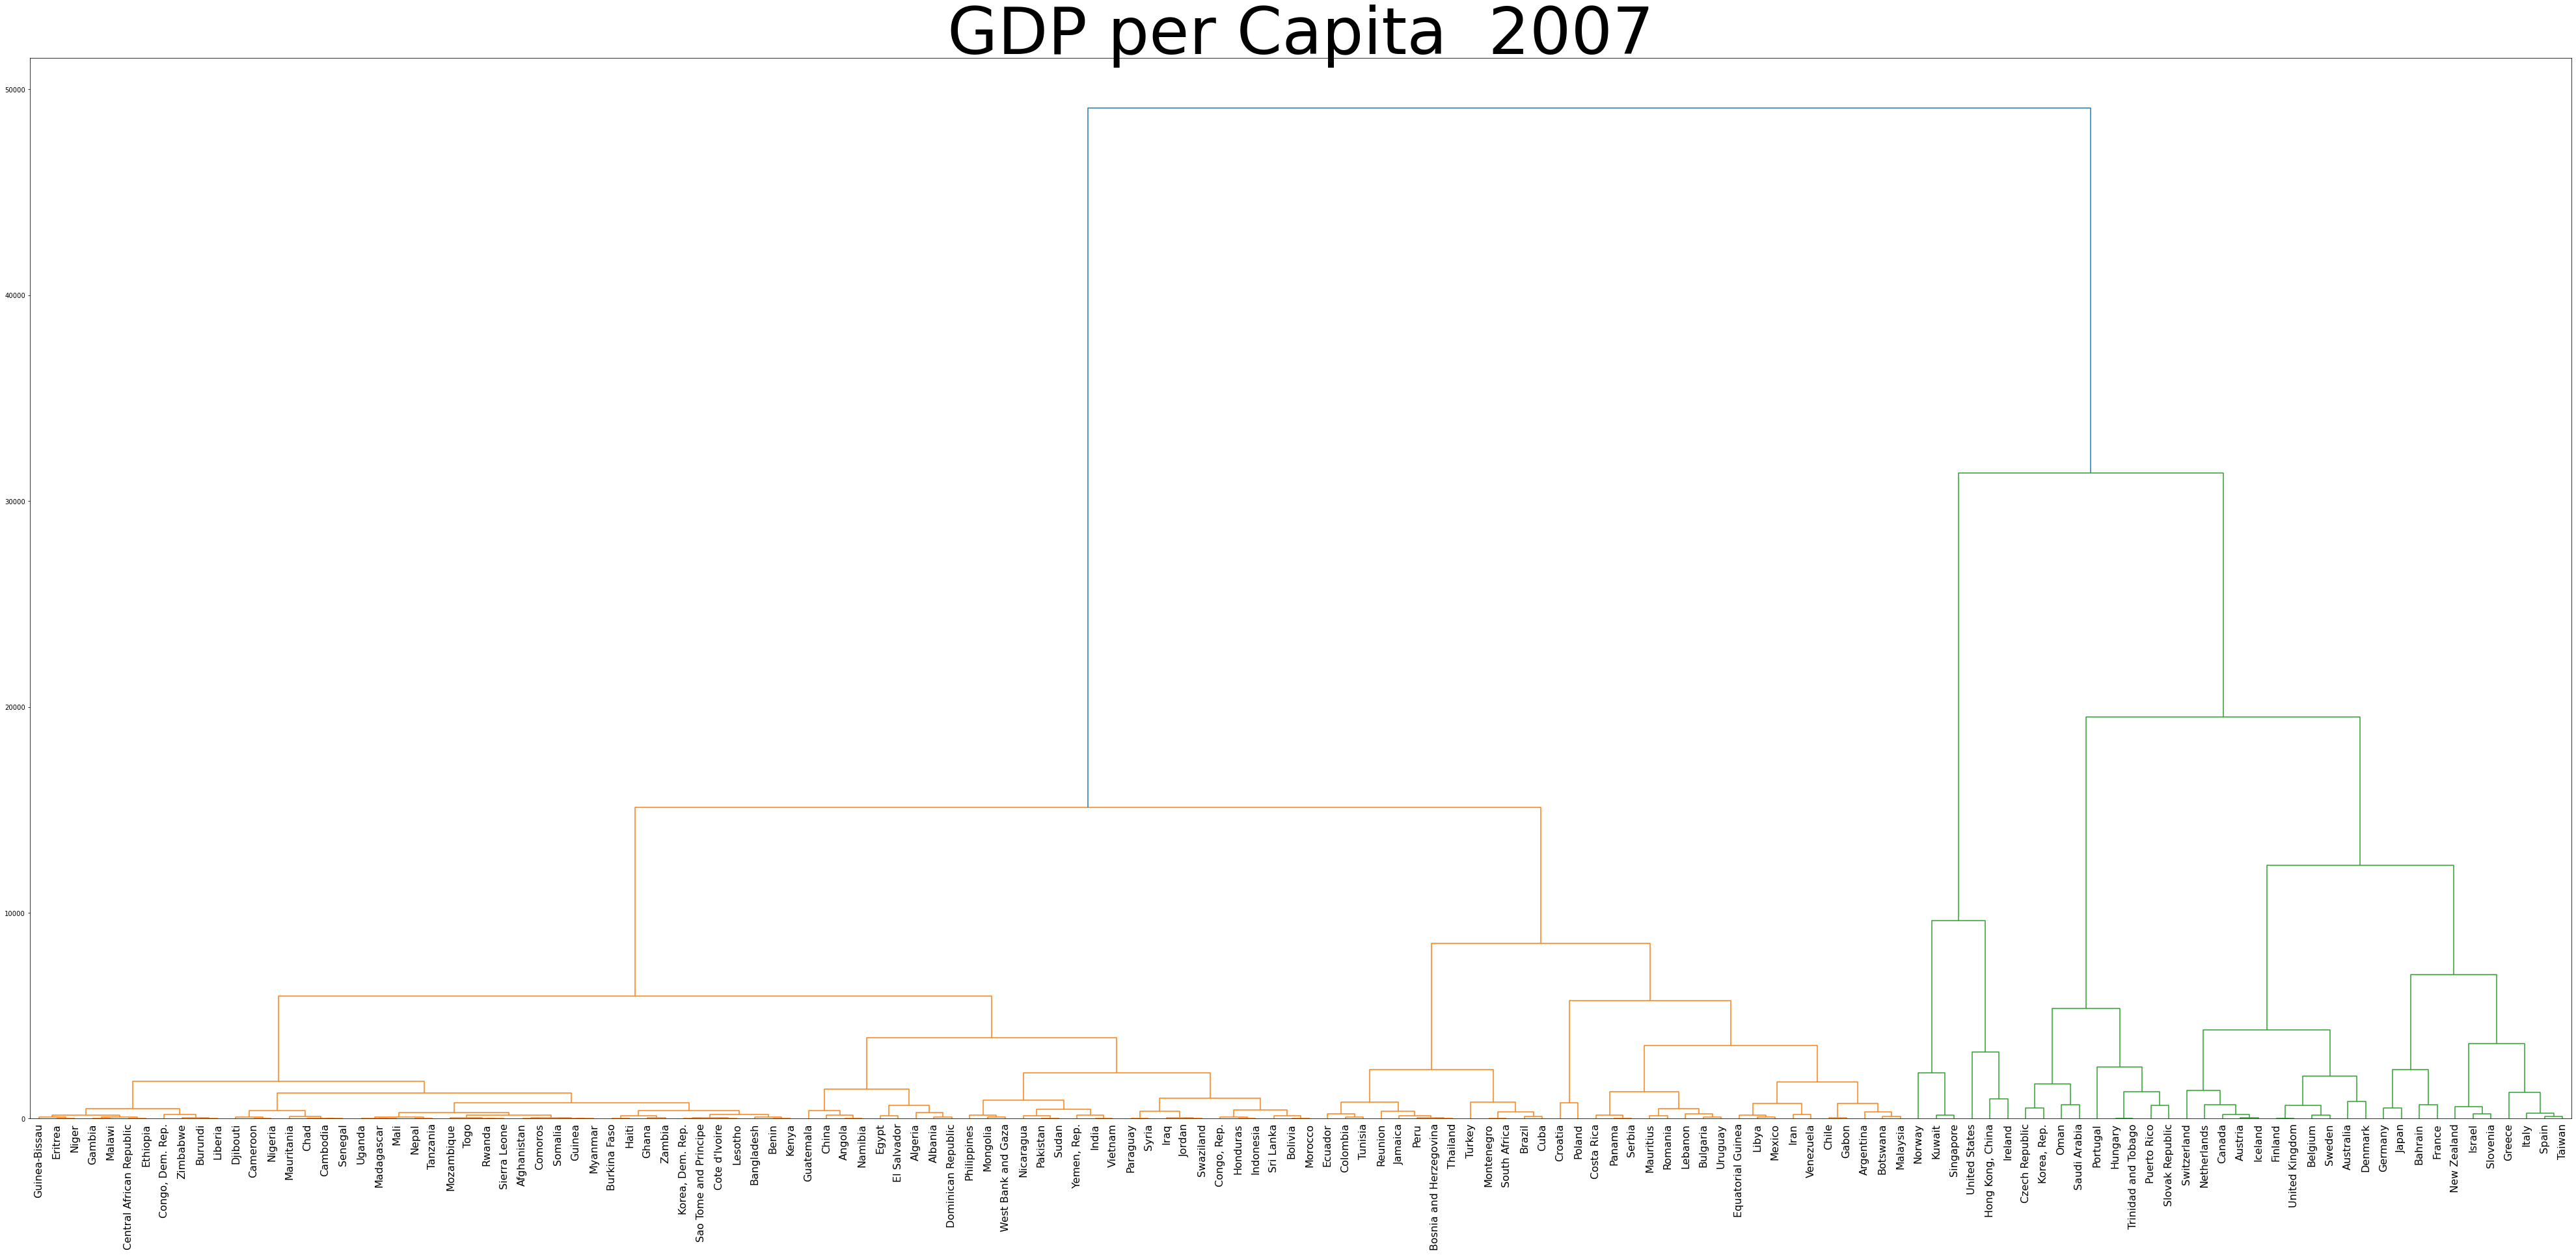

In [19]:
def plot_dendrogram(dataframe, feature, title):
    plt.figure(figsize=(70, 30))
    mergings = linkage(dataframe[[feature]], method='complete')
    dendrogram(mergings, leaf_rotation=90, leaf_font_size=16, labels=list(dataframe['country']))
    plt.title(title, fontsize=100)
    plt.show()

def hierarchical_cluster(year):
    dff = df[df['year']==year]
    plot_dendrogram(dff, 'population', 'Population  '+ str(year))
    plot_dendrogram(dff, 'life_exp', 'Life Expectancy  '+ str(year))
    plot_dendrogram(dff, 'gdp_cap', 'GDP per Capita  '+ str(year))
    

hierarchical_cluster(2007)

My next move is to find out the countries with the most and least population. 

TypeError: set_ticks() takes 2 positional arguments but 3 were given

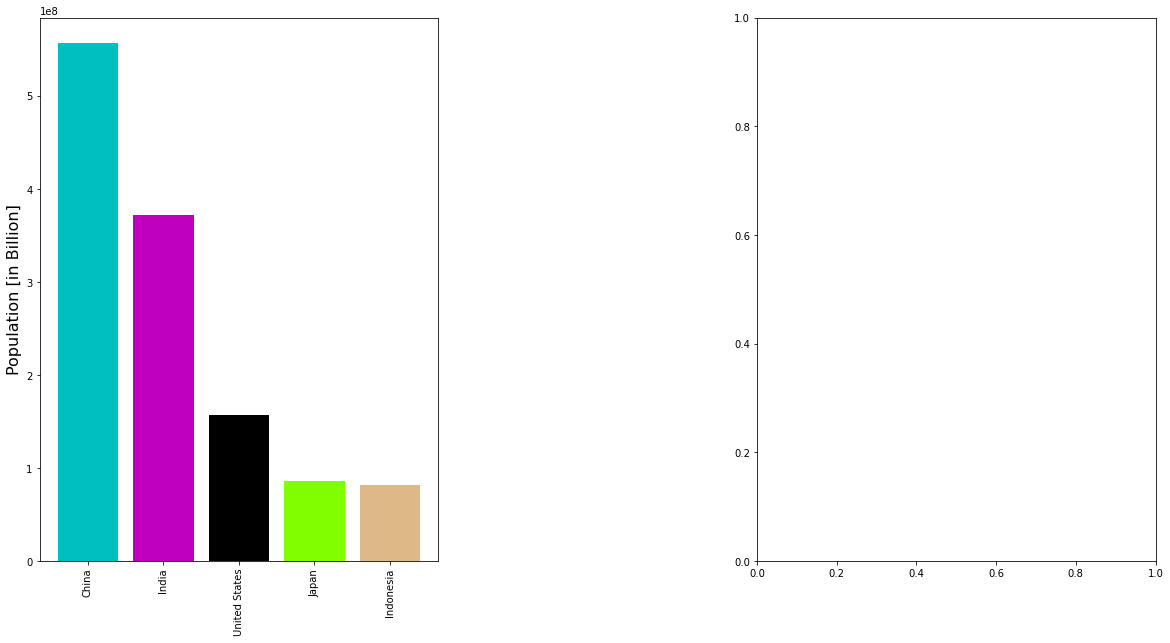

In [21]:
def population_most_and_least(year):

    figs, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
    figs.subplots_adjust(wspace=0.8)
    temp = df[df['year']==year]
    pop_max = temp['population'].nlargest(5)
    pop_min = temp['population'].nsmallest(5)
    
    ax1.bar(temp['country'].loc[pop_max.index], pop_max, color=['c', 'm', 'k', 'chartreuse', 'burlywood'])
    plt.setp(ax1.xaxis.get_majorticklabels(), rotation=90)
    ax1.set_ylabel('Population [in Billion]', fontsize=16)
    ax1.set_yticks([200000000, 400000000, 600000000, 800000000,1000000000, 1200000000, 1400000000], 
                   ['0.2bn', '0.4bn', '0.6bn', '0.8bn', '1bn', '1.2bn', '1.4bn'])
    ax1.title.set_text('5 most populated countries')

    ax2.bar(temp['country'].loc[pop_min.index], pop_min, color=['salmon', 'olivedrab', 
                                                                'steelblue', 'orchid', 'lightseagreen'])
    plt.setp(ax2.xaxis.get_majorticklabels(), rotation=90)
    ax2.title.set_text('5 least populated countries')
    title = 'Population    ' + str(year)
    figs.suptitle(title, fontsize=30)
    plt.show()

population_most_and_least(1952)
population_most_and_least(2007)

Now the same for life expectancy. 

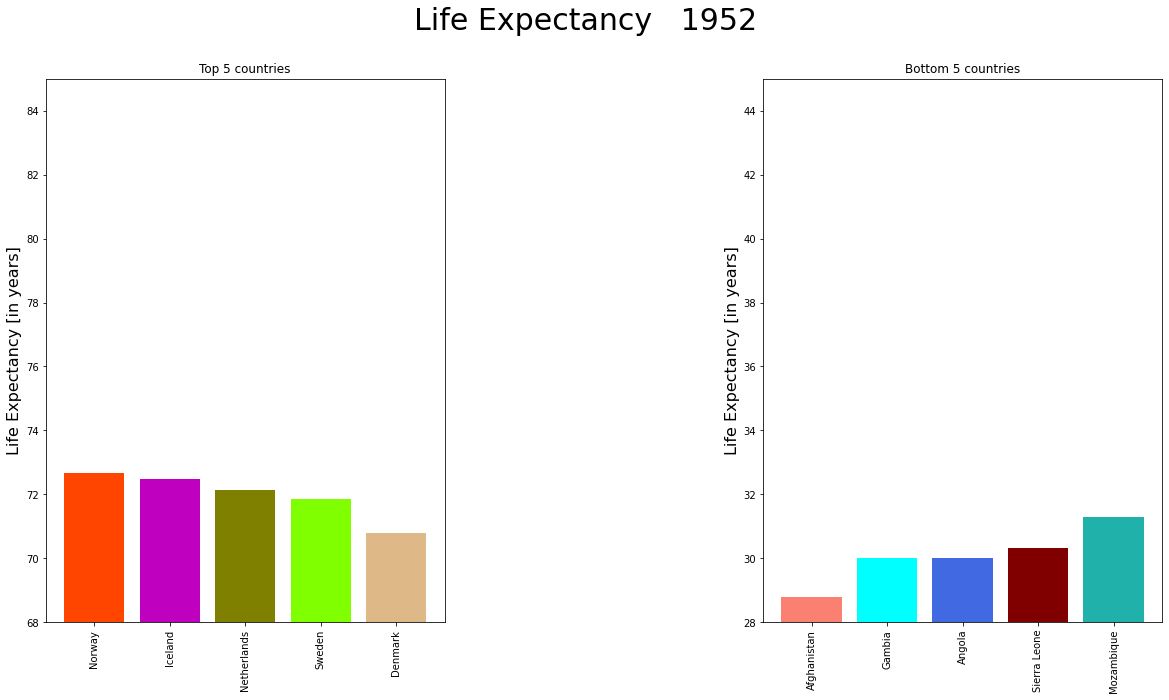

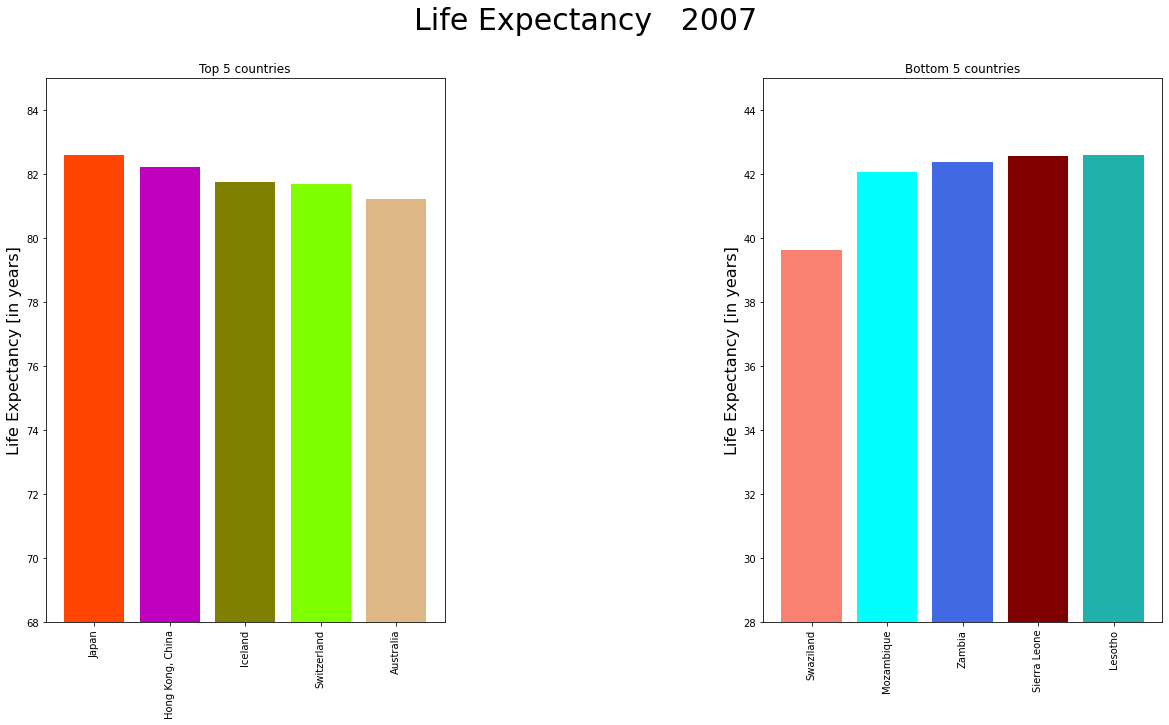

In [22]:
def life_exp_most_and_least(year):

    figs, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
    figs.subplots_adjust(wspace=0.8)
    temp = df[df['year']==year]
    life_max = temp['life_exp'].nlargest(5)
    life_min = temp['life_exp'].nsmallest(5)

    ax1.bar(temp['country'].loc[life_max.index], life_max, color=['orangered', 'm', 'olive', 'chartreuse', 'burlywood'])
    plt.setp(ax1.xaxis.get_majorticklabels(), rotation=90)
    ax1.set_ylim([68, 85])
    ax1.set_ylabel('Life Expectancy [in years]', fontsize=16)
    ax1.title.set_text('Top 5 countries')

    ax2.bar(temp['country'].loc[life_min.index], life_min, color=['salmon', 'cyan', 
                                                                'royalblue', 'maroon', 'lightseagreen'])
    plt.setp(ax2.xaxis.get_majorticklabels(), rotation=90)
    ax2.set_ylim([28, 45])
    ax2.set_ylabel('Life Expectancy [in years]', fontsize=16)
    ax2.title.set_text('Bottom 5 countries')
    title = 'Life Expectancy   ' + str(year)
    figs.suptitle(title, fontsize=30)
    plt.show()
life_exp_most_and_least(1952)
life_exp_most_and_least(2007)

And now GDP per Capita

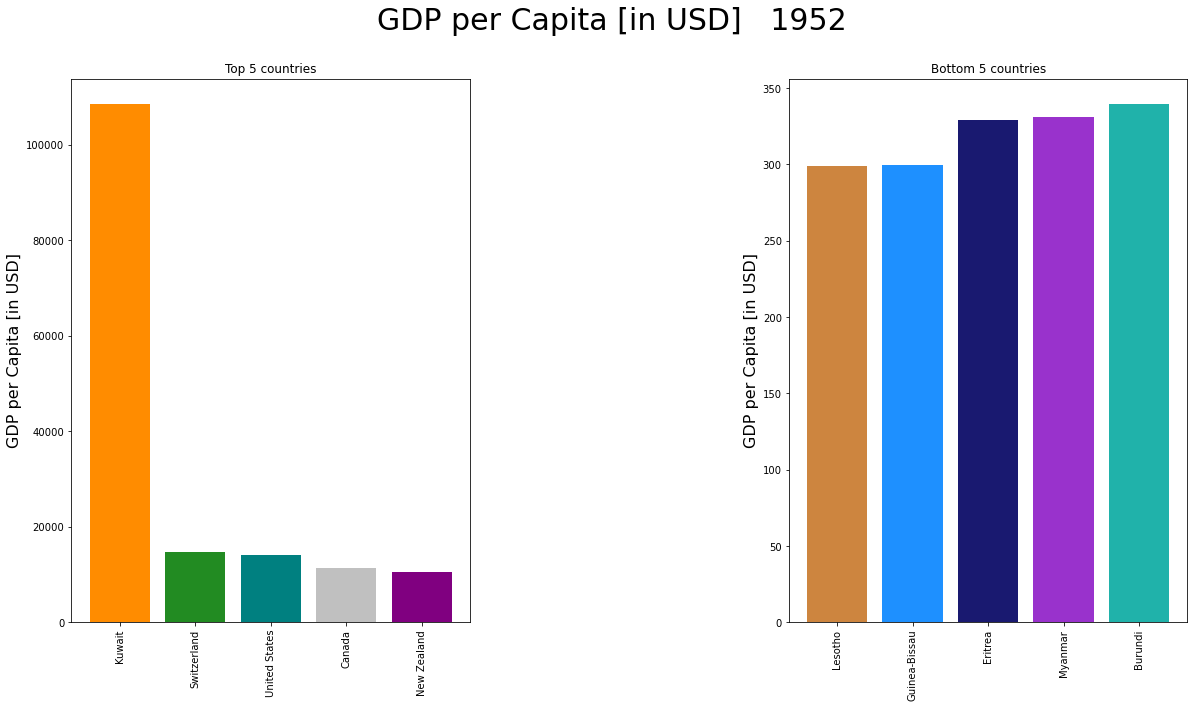

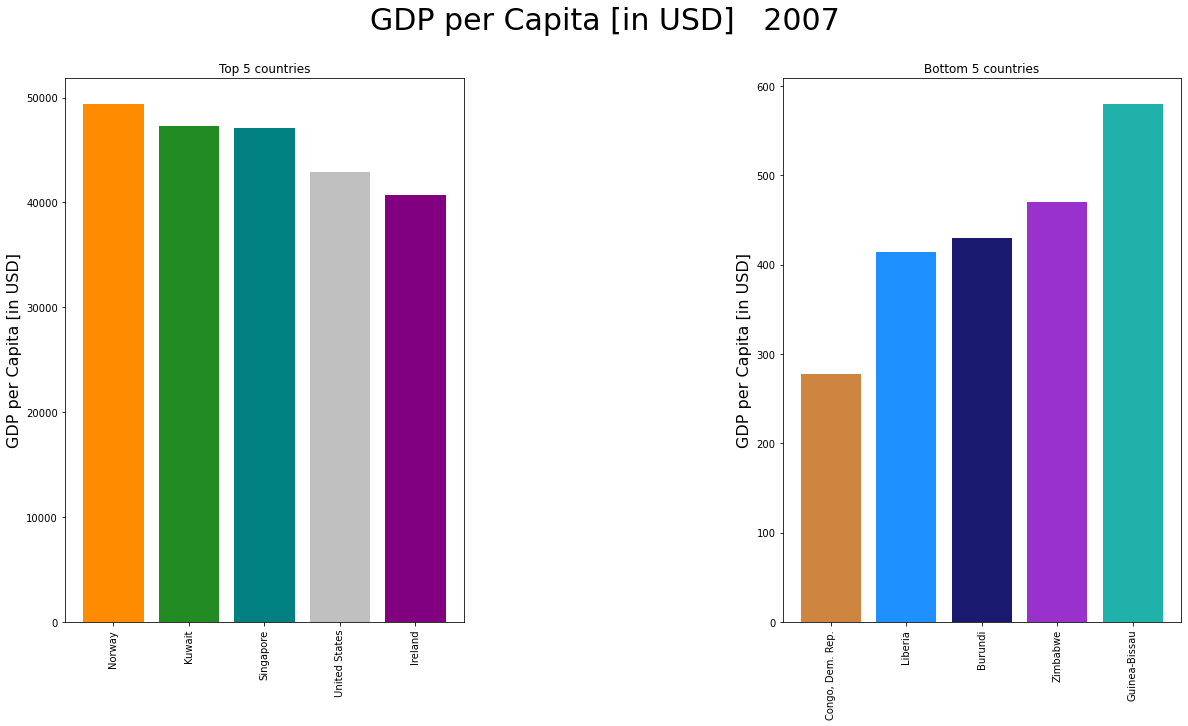

In [24]:
def gdp_cap_most_and_least(year):
    figs, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
    figs.subplots_adjust(wspace=0.8)
    temp = df[df['year']==year]
    gdp_max = temp['gdp_cap'].nlargest(5)
    gdp_min = temp['gdp_cap'].nsmallest(5)

    ax1.bar(temp['country'].loc[gdp_max.index], gdp_max, color=['darkorange', 'forestgreen', 'teal', 'silver', 'purple'])
    plt.setp(ax1.xaxis.get_majorticklabels(), rotation=90)
    ax1.set_ylabel('GDP per Capita [in USD]', fontsize=16)
    ax1.title.set_text('Top 5 countries')

    ax2.bar(temp['country'].loc[gdp_min.index], gdp_min, color=['peru', 'dodgerblue', 
                                                                'midnightblue', 'darkorchid', 'lightseagreen'])
    plt.setp(ax2.xaxis.get_majorticklabels(), rotation=90)

    ax2.set_ylabel('GDP per Capita [in USD]', fontsize=16)
    ax2.title.set_text('Bottom 5 countries')
    title = 'GDP per Capita [in USD]   ' + str(year)
    figs.suptitle(title, fontsize=30)
    plt.show()

gdp_cap_most_and_least(1952) 
gdp_cap_most_and_least(2007)